In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
data1 = pd.read_csv("student-por.csv")

In [7]:
data2 = pd.read_excel("D:\\BrainDead\\Overalldata.xlsx")

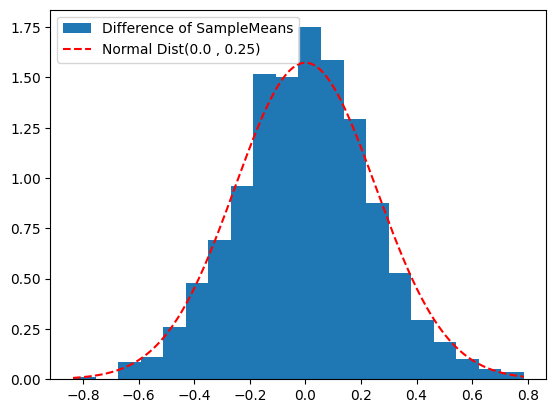

In [83]:
sample_1_size = 100
sample_2_size = 30
sample_means = []
for i in range(1000):
    sample_1 = data1['age'].sample(sample_1_size)
    sample_2 = data1['age'].sample(sample_2_size)
    sample_means.append(sample_1.values.mean() - sample_2.values.mean())
net_var = (data1['age'].var()/sample_1_size) + (data1['age'].var()/sample_2_size)
net_std = net_var**(0.5) 
net_mean = data1['age'].mean() - data1['age'].mean()
lb = min(sample_means)
ub = max(sample_means)
x = np.linspace(lb, ub,1000)
y = norm.pdf(x , net_mean , net_std) 
plt.hist(sample_means , 20 , (lb,ub) , density = True , label='Difference of SampleMeans') 
plt.plot(x , y , 'r--' , label = f'Normal Dist({net_mean} , {round(net_std , 2)})' )
plt.legend()
plt.show()

In [119]:
data2 = data2.transpose()

In [124]:
data2.columns = data2.iloc[0]

In [127]:
data2 = data2.drop(data2.index[0])

In [128]:
data2

State/Union Territory,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,NCT of Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,ALL INDIA
2004-05,9601,135,3470.7,2472.2,4383.3,14.3,145.2,1238.2,3023,122,...,10437,150.4,21.6,5062.2,.,545.1,9555.6,572,14884.8,83131.7
2005-06,11704,146.2,3552.5,3495.5,5011.6,24,147.3,1298,3210,112.1,...,10193,153,21.5,5220,.,552.9,11133.7,590,14510.8,91793.4
2006-07,11872,146.2,2916,4989.3,5041.4,31.1,130.3,1390,3371,123.5,...,10138,169.8,21.5,6610.6,.,620.5,11124,556,14745.9,93355.3
2007-08,13324,158.1,3319,4418.1,5426.6,31.4,121.6,1474,3613,121.5,...,10489,259.6,22.9,5040.2,.,624.6,11780,593,14719.5,96692.9
2008-09,14241,163.9,4008.5,5590.3,4391.8,31.4,123.3,1303,3298,118.3,...,11000,241.1,21.7,5182.7,.,627.1,13097,582,15037.3,99182.5
2009-10,10538,215.8,4335.9,3599.3,4110.4,19.3,100.6,1292,3625,105.9,...,11236,228.3,24.3,5665.2,.,640,10807.1,608,14340.7,89092.9
2010-11,7882.4,234.0,4736.6,3102.1,6159.0,19.6,115.0,1496.6,3472.0,128.9,...,10837.0,265.5,21.0,5792.4,6535.6,702.5,11992.0,550.4,13045.9,95979.8
2011-12,7746.2,255.0,4516.3,7162.6,6028.4,19.8,121.8,1790.0,3759.0,131.6,...,10542.0,253.4,20.9,7458.7,5148.8,718.3,14022.0,594.0,14605.8,105310.9
2012-13,6862.4,263.0,5128.5,7529.3,6608.8,19.7,122.8,1541.0,3976.0,125.3,...,11374.0,222.5,21.3,4049.9,4647.6,713.2,14416.0,579.8,15023.7,105231.6
2013-14,6969.7,276.2,4927.1,5505.8,6716.4,29.6,126.5,1636.0,3998.0,120.8,...,11267.0,312.6,20.3,5349.8,5755.0,711.8,14636.0,578.6,15370.7,106645.5


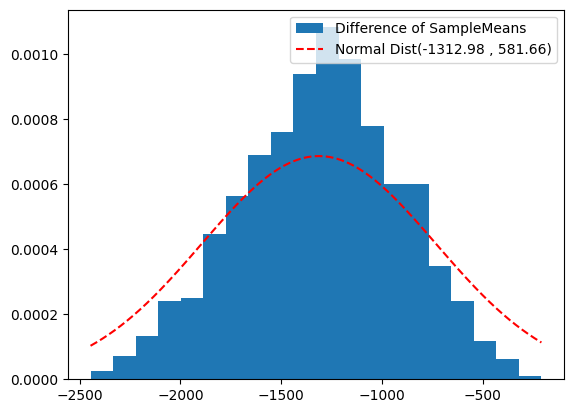

In [130]:
sample_1_size = 15
sample_2_size = 10
sample_means = []
for i in range(1000):
    sample_1 = data2['Assam'].sample(sample_1_size)
    sample_2 = data2['Bihar'].sample(sample_2_size)
    sample_means.append(sample_1.values.mean() - sample_2.values.mean())
net_var = (data2['Assam'].var()/sample_1_size) + (data2['Bihar'].var()/sample_2_size)
net_std = net_var**(0.5) 
net_mean = data2['Assam'].mean() - data2['Bihar'].mean()
lb = min(sample_means)
ub = max(sample_means)
x = np.linspace(lb, ub,1000)
y = norm.pdf(x , net_mean , net_std) 
plt.hist(sample_means , 20 , (lb,ub) , density = True , label='Difference of SampleMeans') 
plt.plot(x , y , 'r--' , label = f'Normal Dist({round(net_mean,2)} , {round(net_std , 2)})' )
plt.legend()
plt.show()